<a href="https://colab.research.google.com/github/vedmara/Python-libraries-for-Data-Sience/blob/main/Assignment_Machine_LearningII_with_Note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BACKGROUND:

The data is a marketing campaign data of a skin care clinic associated with its success.

Description of variables-

          Success: Response to marketing campaign of Skin Care Clinic which offers both products and services. (1: email Opened, 0: email not opened)

          AGE: Age Group of Customer

          Recency_Service: Number of days since last service purchase

          Recency_Product: Number of days since last product purchase

          Bill_Service: Total bill amount for service in last 3 months

          Bill_Product: Total bill amount for products in last 3 months

          Gender (1: Male, 2: Female)

In [42]:
import pandas as pd
import numpy as np
#pip install yfinance before importing
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score,roc_curve, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [43]:
data=pd.read_csv("/content/drive/MyDrive/Springboard_Python/Email Campaign.csv")
data.head()


,SN,Gender,AGE,Recency_Service,Recency_Product,Bill_Service,Bill_Product,Success
0,1,1,<=45,12,11,11.82,2.68,0
1,2,2,<=30,6,0,10.31,1.32,0
2,3,1,<=30,1,9,7.43,0.49,0
3,4,1,<=45,2,14,13.68,1.85,0
4,5,2,<=30,0,11,4.56,1.01,1


Data Preprocessing
Prepare data for modeling by coding categorical variables and dividing the data into features and target variable.

In [44]:
# Encode the AGE variable if it's categorical
data['AGE'] = data['AGE'].astype('category').cat.codes

# Define features and target variable
X = data.drop(columns=['SN', 'Success'])
y = data['Success']

In [45]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

**Decision Tree**

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       503
           1       0.43      0.48      0.45       180

    accuracy                           0.70       683
   macro avg       0.62      0.63      0.62       683
weighted avg       0.71      0.70      0.70       683



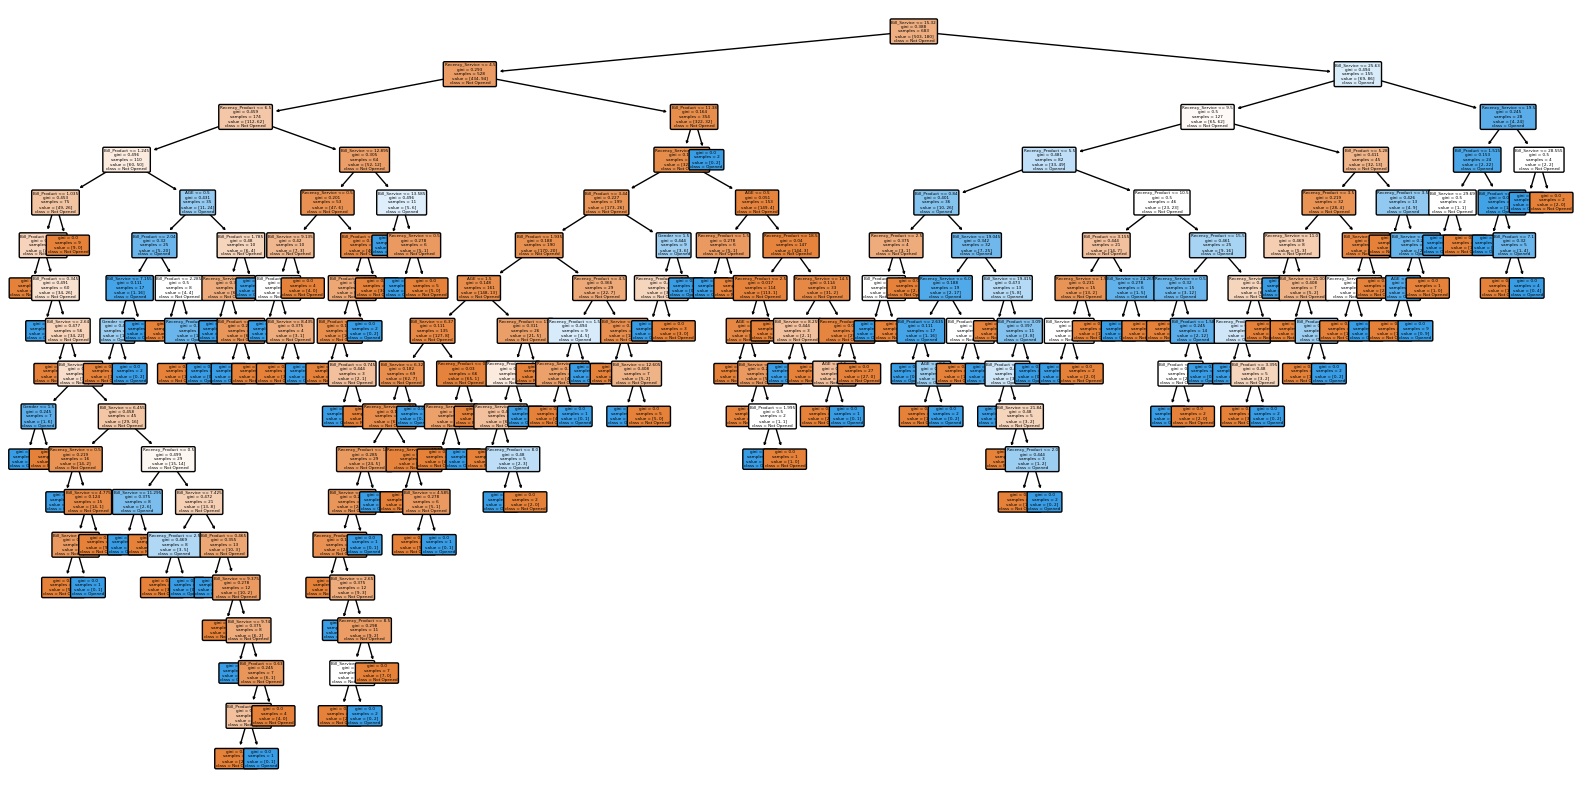

In [46]:
# Train the decision tree classifier using cross-validation
dt_model = DecisionTreeClassifier(random_state=42)
y_pred_dt = cross_val_predict(dt_model, X, y, cv=cv, method='predict')

# Print classification report
print("Decision Tree Classification Report:")
print(classification_report(y, y_pred_dt))

# Train the decision tree on the entire dataset for visualization
dt_model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Opened', 'Opened'], filled=True, rounded=True, fontsize=3)
plt.show()

Comment : The model accuracy is 70% and sensitivity is 48%

**2. Train and compare the performance of random forest with decision tree using ROC AUC metric.**

In [47]:
# Train the random forest classifier using cross-validation
rf_model = RandomForestClassifier(random_state=42)
y_pred_rf = cross_val_predict(rf_model, X, y, cv=cv, method='predict')

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y, y_pred_rf))

# Calculate accuracy and sensitivity (recall)
accuracy_rf = accuracy_score(y, y_pred_rf)
sensitivity_rf = recall_score(y, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Sensitivity (Recall) for class 1: {sensitivity_rf:.2f}")

# Predict probabilities for ROC AUC
y_pred_prob_rf = cross_val_predict(rf_model, X, y, cv=cv, method='predict_proba')[:, 1]

# Calculate ROC AUC
roc_auc_rf = roc_auc_score(y, y_pred_prob_rf)
print(f"Random Forest ROC AUC: {roc_auc_rf:.2f}")

# Calculate ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y, y_pred_prob_rf)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       503
           1       0.67      0.46      0.55       180

    accuracy                           0.80       683
   macro avg       0.75      0.69      0.71       683
weighted avg       0.79      0.80      0.78       683

Accuracy: 0.80
Sensitivity (Recall) for class 1: 0.46
Random Forest ROC AUC: 0.80


Comment : The model accuracy is 80% and sensitivity is 46%

**3. Training a neural network classifier and evaluating its performance using ROC AUC.**

In [48]:
# Train the neural network classifier using cross-validation
nn_model = MLPClassifier(random_state=42, max_iter=300)
y_pred_nn = cross_val_predict(nn_model, X, y, cv=cv, method='predict')

# Print classification report
print("Neural Network Classification Report:")
print(classification_report(y, y_pred_nn))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       503
           1       0.66      0.46      0.54       180

    accuracy                           0.80       683
   macro avg       0.74      0.69      0.71       683
weighted avg       0.78      0.80      0.78       683



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Comment : The model accuracy is 80% and sensitivity is 46%

Decision Tree ROC AUC: 0.63
Random Forest ROC AUC: 0.80
Neural Network ROC AUC: 0.83


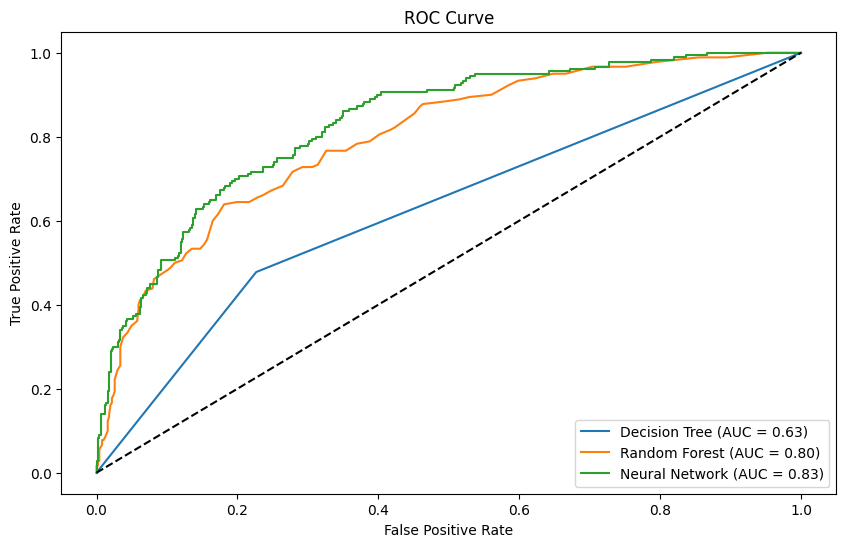

In [49]:
# Calculate ROC AUC
roc_auc_dt = roc_auc_score(y, y_pred_prob_dt)
roc_auc_rf = roc_auc_score(y, y_pred_prob_rf)
roc_auc_nn = roc_auc_score(y, y_pred_prob_nn)

print(f"Decision Tree ROC AUC: {roc_auc_dt:.2f}")
print(f"Random Forest ROC AUC: {roc_auc_rf:.2f}")
print(f"Neural Network ROC AUC: {roc_auc_nn:.2f}")

# Calculate ROC curves
fpr_dt, tpr_dt, _ = roc_curve(y, y_pred_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y, y_pred_prob_rf)
fpr_nn, tpr_nn, _ = roc_curve(y, y_pred_prob_nn)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Conclusion: Based on this analysis, the neural network model appears to outperform both the decision tree and random forest models. However, further analysis and tuning may be required to enhance sensitivity for Class 1, particularly in identifying instances of email open events. Nonetheless, even at this initial design stage, the neural network model demonstrates promising results compared to previous models. For instance, the neural network achieves an accuracy of 0.80, surpassing that of the Logistic Regression model, while also outperforming the Naive Bayes model, which achieves a slightly lower accuracy of 0.786. Additionally, the Support Vector Machine model lags behind with an accuracy of 0.72.**